# Data structures

For a refresher on object-oriented programming, see [Object-oriented programming](https://github.com/parrt/msds501/blob/master/notes/OO.ipynb).

## A simple set implementation

In [4]:
class MySet:
    def __init__(self):
        self.elements = []
    def add(self, x):
        if x not in self.elements:
            self.elements.append(x)

In [5]:
s = MySet()
s.add(3)  # same as MySet.add(a,3)
s.add(3)
s.add(2)
s.add('cat')
s.elements

[3, 2, 'cat']

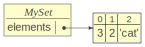

In [6]:
from lolviz import *
objviz(s)

## Linked lists -- the gateway drug

We've studied arrays/lists that are built into Python but they are not always the best kind of list to use. Sometimes, we are inserting and deleting things from the head or middle of the list. If we do this in lists made up of contiguous cells in memory, we have to move a lot of cells around to make room for a new element or to close a hole made by a deletion.

Linked lists allow us to efficiently insert and remove things anywhere we want, at the cost of more memory.

A linked list associates a next pointer with each value. We call these things "nodes"


In [7]:
class LLNode:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

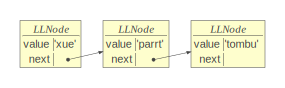

In [8]:
head = LLNode('tombu')
head = LLNode('parrt', head)
head = LLNode("xue", head)
objviz(head)

## Walk list

In [9]:
p = head
while p is not None:
    print(p.value)
    p = p.next

xue
parrt
tombu


## Insertion at head

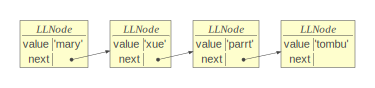

In [10]:
x = LLNode('mary')
x.next = head
head = x
objviz(head)

## Deletion of node

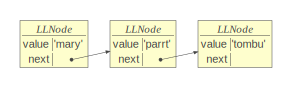

In [11]:
# to delete xue, make previous node skip over xue
xue = head.next
head.next = xue.next
objviz(head)

## Binary trees

In [12]:
class Tree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right       

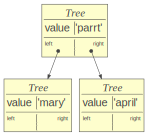

In [13]:
root = Tree('parrt')
root.left = Tree('mary')
root.right = Tree('april')
treeviz(root)

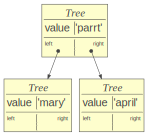

In [14]:
root = Tree('parrt', Tree('mary'), Tree('april'))
treeviz(root)

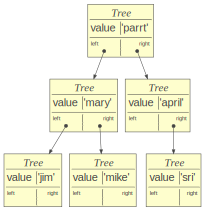

In [15]:
root = Tree('parrt')
mary = Tree('mary')
april = Tree('april')
jim = Tree('jim')
sri = Tree('sri')
mike = Tree('mike')

root.left = mary
root.right = april
mary.left = jim
mary.right = mike
april.right = sri

treeviz(root)

### Exercise

Create a class definition for `Tree` that allows arbitrary numbers of children. (Use a list for field `children` rather than `left` and `right`.)  The constructor should init an empty children list.  Test your code using:

```python
root = Tree('parrt')
mary = Tree('mary')
april = Tree('april')
jim = Tree('jim')
sri = Tree('sri')
mike = Tree('mike')

root.addchild(mary)
root.addchild(jim)
root.addchild(sri)
sri.addchild(mike)
sri.addchild(april)

from lolviz import objviz
objviz(root)
```

#### Solution

In [16]:
class Tree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.children = []
        
    def addchild(self, child):
        if isinstance(child, Tree):
            self.children.append(child)

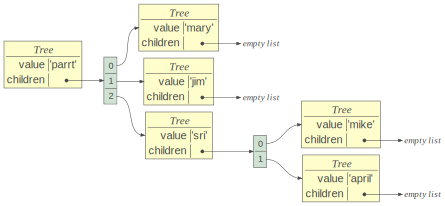

In [17]:
root = Tree('parrt')
mary = Tree('mary')
april = Tree('april')
jim = Tree('jim')
sri = Tree('sri')
mike = Tree('mike')

root.addchild(mary)
root.addchild(jim)
root.addchild(sri)
sri.addchild(mike)
sri.addchild(april)

objviz(root)

## Graphs

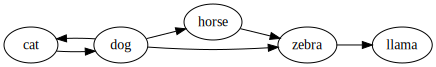

In [18]:
import graphviz as gv

gv.Source("""
digraph G {
    rankdir=LR;
    cat->dog
    dog->cat
    dog->horse
    dog->zebra
    horse->zebra
    zebra->llama
}
""")

In [19]:
class GNode:
    def __init__(self, value):
        self.value = value
        self.edges = [] # outgoing edges
        
    def connect(self, other):
        self.edges.append(other)

In [20]:
cat = GNode('cat')
dog = GNode('dog')
horse = GNode('horse')
zebra = GNode('zebra')
llama = GNode('llama')

cat.connect(dog)
dog.connect(cat)
dog.connect(horse)
dog.connect(zebra)
horse.connect(zebra)
zebra.connect(llama)

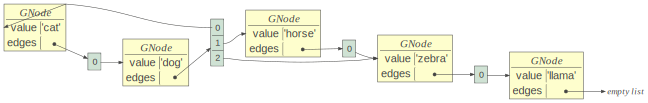

In [21]:
objviz(cat)

# Operator overloading

(Note: We *overload* operators but *override* methods in a subclass definition)

Python allows class definitions to implement functions that are called when standard operator symbols such as `+` and `/` are applied to objects of that type. This is extremely useful for mathematical libraries such as numpy, but is often abused. Note that you could redefine subtraction to be multiplication when someone used the `-` sign. (Yikes!)

Here's an extension to `Point` that supports `+` for `Point` addition:

In [22]:
import numpy as np

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, other):
        return np.sqrt( (self.x - other.x)**2 + (self.y - other.y)**2 )
    
    def __add__(self,other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x,y)
    
    def __str__(self):
        return f"({self.x},{self.y})"

In [23]:
p = Point(3,4)
q = Point(5,6)
print(p, q)
print(p + q) # calls p.__add__(q) or Point.__add__(p,q)
print(Point.__add__(p,q))

(3,4) (5,6)
(8,10)
(8,10)
